# Fixing the value of variables 
Provided a model has been specified to allow this it is possible to fix the values of some endogenous variable. This can be 
useful in many situations. Also when a variable is fixed a matching add factor is calculated. This keeps the result unchanged 
when the fixing is lifted and the marginal properties of the model is preserved. 

## Import the model class
This class incorporates most of the methods used to manage a model. 

In [1]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')
  incolab = True  
else:
  incolab = False 

In [2]:
 %load_ext autoreload
 %autoreload 2

In [3]:
import pandas as pd
from modelclass import model 
import modelwidget as mw
model.widescreen()
model.scroll_off()

## Load a pre-existing model, data and descriptions 
The file `pak.pcim` contains a dump of model equations, dataframe, simulation options and variable descriptions. The file was created separately. 

The modelload method returns an instance ```mpak``` of the ```model``` class, and a dataframe ```result``` that holds the baseline run. 

In [4]:
mpak,result = model.modelload('../../models/pak.pcim',run=1,silent=1)

file read:  C:\mflow\modelflow-manual\papers\mfbook\content\models\pak.pcim


## How to fix the values for variables

The equation for a fixable variable should like this: 
>frml <z,exo> VAR  = (expression)*(1-VAR_D) + VAR_X * VAR_D

Each endogenous variable which has an _D variable and _X variable can be fixed
 
_D=1 means that the variable is to be fixed and 

_X holds the value to which it should be fixed

In the pak model all stocastic equations are fixable.

### .fix(dataframe,variable pattern, start,end) Returns a dataframe where variables matching pattern are fixed

The code fixes the values for some variables by setting the _X variable to the current value, and _D variable to 1 in the timespan \[start,end].

In [5]:
var_to_be_fixed = 'PAKGGEXPCAPTCN PAKGGEXPGNFSCN PAKGGEXPOTHRCN PAKGGEXPTRNSCN'
fix_df = mpak.fix(result,var_to_be_fixed,2021,2100)

## Now run the model with the new dataframe

In [6]:
_ = mpak(fix_df,silent=1,keep=f'Baseline') # _ is just a  name, the dataframe is not going to be used 

In [7]:
alternative  =  fix_df.upd("<2023 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 29")

In [8]:
_ = mpak(alternative,silent=1,keep=f'Tax = 29',alfa = 0.5)

In [9]:
with mpak.set_smpl(2020,2030):
    display(mpak['PAKNYGDPMKTPKN'])

### .fix_inf() Show relevant variables for each fixed variables
To make it short we only show the first 4 years  

In [10]:
with mpak.set_smpl(2021,2024):
    mpak.fix_inf()


General government expenditure on capital expenditure (millions lcu)

FRML <Z,EXO> PAKGGEXPCAPTCN = (0.3*PAKGGEXPCAPTCN(-1)+(1-0.3)*(0.37*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0)))+393385.011*DURING_2013 + PAKGGEXPCAPTCN_A)* (1-PAKGGEXPCAPTCN_D)+ PAKGGEXPCAPTCN_X*PAKGGEXPCAPTCN_D  $

FRML <CALC> PAKGGEXPCAPTCN_A = (PAKGGEXPCAPTCN) - (0.3*PAKGGEXPCAPTCN(-1)+(1-0.3)*(0.37*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0)))+393385.011*DURING_2013)$


,PAKGGEXPCAPTCN,PAKGGEXPCAPTCN_X,PAKGGEXPCAPTCN_D,PAKGGEXPCAPTCN_A
2021,2974606.103547,2974606.103547,1,182969.551875
2022,3350772.739313,3350772.739313,1,155524.069095
2023,3753199.753576,3753199.753576,1,-103778.940212
2024,4183595.804971,4183595.804971,1,-132838.186771



General government expenditure on goods and services (millions lcu)

FRML <Z,EXO> PAKGGEXPGNFSCN = (0.3*PAKGGEXPGNFSCN(-1)+(1-0.3)*(0.80*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0)))+505277.259999999*DURING_2012 + PAKGGEXPGNFSCN_A)* (1-PAKGGEXPGNFSCN_D)+ PAKGGEXPGNFSCN_X*PAKGGEXPGNFSCN_D  $

FRML <CALC> PAKGGEXPGNFSCN_A = (PAKGGEXPGNFSCN) - (0.3*PAKGGEXPGNFSCN(-1)+(1-0.3)*(0.80*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0)))+505277.259999999*DURING_2012)$


,PAKGGEXPGNFSCN,PAKGGEXPGNFSCN_X,PAKGGEXPGNFSCN_D,PAKGGEXPGNFSCN_A
2021,6273348.472013,6273348.472013,1,292080.034768
2022,7109444.007169,7109444.007169,1,248267.921448
2023,7999585.201438,7999585.201438,1,-299187.183403
2024,8947399.920655,8947399.920655,1,-350797.943926



General government expenditures, other (includes transfers), (millions LCU)

FRML <Z,EXO> PAKGGEXPOTHRCN = (PAKGGEXPOTHRCN_A*PAKNYGDPMKTPXN*PAKNYGDPPOTLKN+PAKNYGDPMKTPXN*PAKNYGDPPOTLKN* (-0.00369060695899124) ) * (1-PAKGGEXPOTHRCN_D)+ PAKGGEXPOTHRCN_X*PAKGGEXPOTHRCN_D  $

FRML <CALC> PAKGGEXPOTHRCN_A = PAKGGEXPOTHRCN/(PAKNYGDPMKTPXN*PAKNYGDPPOTLKN)- ((-0.00369060695899124)) $


,PAKGGEXPOTHRCN,PAKGGEXPOTHRCN_X,PAKGGEXPOTHRCN_D,PAKGGEXPOTHRCN_A
2021,-157197.246534,-157197.246534,1,0.000630
2022,-182595.726020,-182595.726020,1,0.000535
2023,-209094.462145,-209094.462145,1,0.000495
2024,-236487.252829,-236487.252829,1,0.000419



Current Transfers

FRML <Z,EXO> PAKGGEXPTRNSCN = (0.91020884318931*PAKGGEXPTRNSCN(-1)+(1-0.91020884318931)*(0.06*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0))) + PAKGGEXPTRNSCN_A)* (1-PAKGGEXPTRNSCN_D)+ PAKGGEXPTRNSCN_X*PAKGGEXPTRNSCN_D  $

FRML <CALC> PAKGGEXPTRNSCN_A = (PAKGGEXPTRNSCN) - (0.91020884318931*PAKGGEXPTRNSCN(-1)+(1-0.91020884318931)*(0.06*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0))))$


,PAKGGEXPTRNSCN,PAKGGEXPTRNSCN_X,PAKGGEXPTRNSCN_D,PAKGGEXPTRNSCN_A
2021,515359.573986,515359.573986,1,42678.845355
2022,553263.885067,553263.885067,1,36277.017735
2023,588831.934214,588831.934214,1,25926.952119
2024,623434.853192,623434.853192,1,21109.640260


### The result match the result before exogenizing, as it should 
Numbers below show the difference in pct betwen the solution whitout and with fixing

The difference is small and OK 

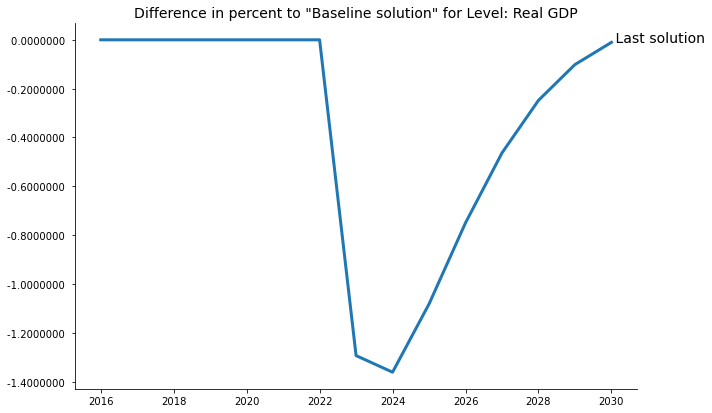

In [11]:
with mpak.keepswitch(True):
    mpak.keep_plot('PAKNYGDPMKTPKN',diffpct=1,dec=7)

## Dump the model and solution for later use

In [12]:
mpak.modeldump('../../models/pak_exogenized.pcim')

## More advanced information
The model instance (here mpak) maintain properties related to the fixing of values.

### List of potential and actual fixed variables
The model instance (here mpak) maintain properties related to the fixing of values.

|Variable type|Variable name suffix|Lists for all fixable variables|List of fixed variables|
|:--|:--|:--|:--|    
Endogenous|  |.fix_endo|.fix_endo_fixed
Dummy|_D|.fix_dummy|.fix_dummy_fixed
Fixed value|_X|.fix_value|.fix_value_fixed
Add factor|_A|.fix_add_factor|.fix_add_factor_fixed

#### LIst of all fixable variables for this model 

In [13]:
all_fix_var =[vars for vars in zip(mpak.fix_dummy,mpak.fix_value,mpak.fix_add_factor)]
fix_names = pd.DataFrame(all_fix_var,columns=['Dummy','Fixed value','Add factor'],index=mpak.fix_endo)
mw.htmlwidget_df(mpak,fix_names).show

HTML(value='<style type="text/css">\n#T_cf167 thead tr:nth-child(1) th {\n  position: sticky;\n  background-co…

:::{note}
**Dataframes with strings and zip**

Pandas dataframes are very versatile. Here the dataframe is filled not with scalars but with strings. 

Also the zip function is used to combine lists. [More here](https://docs.python.org/3/library/functions.html#zip)
:::

#### List of fixed variables

In [10]:
fixed_fix_var =[vars for vars in 
                 zip(mpak.fix_dummy_fixed,mpak.fix_value_fixed,mpak.fix_add_factor_fixed)]
fixed_names = pd.DataFrame(fixed_fix_var,columns=['Dummy','Fixed value','Add factor'],index=mpak.fix_endo_fixed)
mw.htmlwidget_df(mpak,fixed_names).show

HTML(value='<style type="text/css">\n#T_e648b_ thead tr:nth-child(1) th {\n  position: sticky;\n  background-c…

#### Is there a model (.calc_add_factor_model) available  to calculate the add factors corresponding to the fixed values

In [11]:
mpak.split_calc_add_factor

True

#### Show the equations for the .calc_add_factor_model
Here only 3 are displayed. Delete the [:3] and all equations will be displayed.

In [12]:
mpak.calc_add_factor_model.equations.split('$')[:3]

['FRML <CALC> PAKBMFSTOTHRCD_A = -PAKBMFSTOTHRCD/PAKNYGDPMKTPCD+ ((-0.0106244247103773)) ',
 ' FRML <CALC> PAKBMFSTREMTCD_A = -PAKBMFSTREMTCD/PAKNYGDPMKTPCD+ ((5.83179728399106E-05)) ',
 ' FRML <CALC> PAKBMGSRGNFSCD_A = -100*PAKBMGSRGNFSCD/PAKBMGSRGNFSCD(-1)+ (((100 * ( (PAKNEIMPGNFSCD) / (PAKNEIMPGNFSCD(-1)) -1)) +0.16331992292838*DUMH)) +100']